In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
s_tr = pd.read_csv("bigdatamart_Train.csv")
s_tr.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [3]:
s_tr.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [4]:
s_tr.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
s_tr.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
mean_wt_per_Item_Id = pd.pivot_table(values="Item_Weight", index="Item_Identifier", data=s_tr)
mean_wt_per_Item_Id

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [7]:
s_tr['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [8]:
mval = s_tr['Item_Weight'].isnull()
mval.value_counts()

False    7060
True     1463
Name: Item_Weight, dtype: int64

In [9]:
count = 0
for i,item in enumerate(s_tr['Item_Identifier']):
    if mval[i]:
        if item in mean_wt_per_Item_Id:
            count = count + 1
            s_tr['Item_Weight'][i] = mean_wt_per_Item_Id.loc[item]['Item_Weight']
        else:
            s_tr['Item_Weight'][i] = np.mean(s_tr['Item_Weight'])

In [10]:
s_tr.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
s_tr['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [12]:
out_size_mode = pd.pivot_table(values="Outlet_Size", columns="Outlet_Type", aggfunc=(lambda x: x.mode()[0]), data = s_tr)
out_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [13]:
mval = s_tr['Outlet_Size'].isnull()

In [14]:
s_tr.loc[mval, 'Outlet_Size'] = s_tr.loc[mval, 'Outlet_Type'].apply(lambda x: out_size_mode[x])

In [15]:
s_tr['Outlet_Size'].isnull().sum()

0

In [16]:
s_tr.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [17]:
len(s_tr['Item_Identifier'].unique())

1559

In [18]:
s_tr.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,4710.5350


In [19]:
s_tr['Item_Visibility'][s_tr['Item_Visibility'] == 0] = np.mean(s_tr['Item_Visibility'])

In [20]:
s_tr.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.066132,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,4710.5350


In [21]:
sum(s_tr['Item_Visibility'] == 0)

0

In [22]:
cat_col = []
for i in s_tr.columns:
    if s_tr[i].dtypes == 'object':
        cat_col.append(i)
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [23]:
for i in cat_col:
    print(s_tr[i].value_counts())

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


In [24]:
s_tr['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'}, inplace=True)
s_tr['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [25]:
s_tr.shape

(8523, 12)

In [26]:
s_tr.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.070213,140.992782,1997.831867,2181.288914
std,4.226124,0.048742,62.275067,8.371760,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,9.310000,0.033085,93.826500,1987.000000,834.247400
50%,12.857645,0.062517,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [27]:
s_tr['Outlet_Age'] = 2013 - s_tr['Outlet_Establishment_Year']
s_tr.drop('Outlet_Establishment_Year',1,inplace=True)
s_tr.sample(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
1447,FDX10,6.385000,Regular,0.123961,Snack Foods,33.2874,OUT045,Small,Tier 2,Supermarket Type1,141.1496,11
6346,FDC14,14.500000,Regular,0.041215,Canned,42.0454,OUT013,High,Tier 3,Supermarket Type1,629.1810,26
6771,FDD39,16.700000,Low Fat,0.070097,Dairy,217.8850,OUT013,High,Tier 3,Supermarket Type1,3894.9300,26
8285,FDB08,6.055000,Low Fat,0.066132,Fruits and Vegetables,162.3578,OUT035,Small,Tier 2,Supermarket Type1,1604.5780,9
8198,FDR59,12.857645,Regular,0.063554,Breads,263.6594,OUT027,Medium,Tier 3,Supermarket Type3,3401.5722,28
6658,DRH25,18.700000,Low Fat,0.024426,Soft Drinks,52.9324,OUT010,Small,Tier 3,Grocery Store,51.9324,15
703,NCT18,14.600000,Low Fat,0.059394,Household,181.7976,OUT035,Small,Tier 2,Supermarket Type1,3259.7568,9
2547,FDK56,9.695000,Low Fat,0.066132,Fruits and Vegetables,185.1898,OUT035,Small,Tier 2,Supermarket Type1,2619.2572,9
3288,NCL07,12.857645,Low Fat,0.031187,Others,39.5480,OUT027,Medium,Tier 3,Supermarket Type3,759.0120,28
2504,FDT32,19.000000,Regular,0.065736,Fruits and Vegetables,189.6214,OUT049,Medium,Tier 1,Supermarket Type1,2826.3210,14


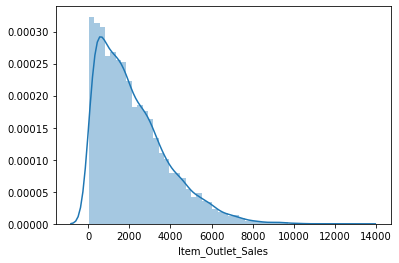

In [28]:
sns.distplot(s_tr['Item_Outlet_Sales'])

In [29]:
s_tr['Item_Outlet_Sales'] = np.log(1+s_tr['Item_Outlet_Sales'])
#Since there are 0 also so log will make infinite value so we have added 1

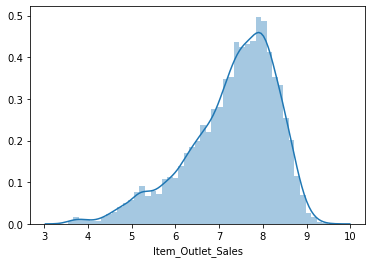

In [30]:
sns.distplot(s_tr['Item_Outlet_Sales'])

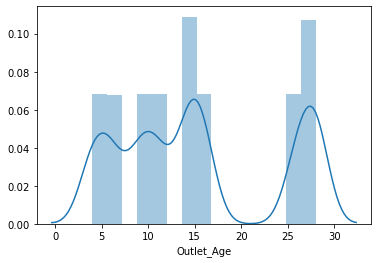

In [31]:
sns.distplot(s_tr['Outlet_Age'])

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
s_tr['Outlet_Identifier'] = le.fit_transform(s_tr['Outlet_Identifier'])
s_tr['Outlet_Identifier'].describe()

count    8523.000000
mean        4.722281
std         2.837201
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max         9.000000
Name: Outlet_Identifier, dtype: float64

In [33]:
dict1 = []
for i in cat_col:
    s_tr[i] = le.fit_transform(s_tr[i])
    dict1.append({key: value for key,value in enumerate(le.classes_)})

print(dict1)

[{0: 'Low Fat', 1: 'Regular'}, {0: 'Baking Goods', 1: 'Breads', 2: 'Breakfast', 3: 'Canned', 4: 'Dairy', 5: 'Frozen Foods', 6: 'Fruits and Vegetables', 7: 'Hard Drinks', 8: 'Health and Hygiene', 9: 'Household', 10: 'Meat', 11: 'Others', 12: 'Seafood', 13: 'Snack Foods', 14: 'Soft Drinks', 15: 'Starchy Foods'}, {0: 'High', 1: 'Medium', 2: 'Small'}, {0: 'Tier 1', 1: 'Tier 2', 2: 'Tier 3'}, {0: 'Grocery Store', 1: 'Supermarket Type1', 2: 'Supermarket Type2', 3: 'Supermarket Type3'}]


In [34]:
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [35]:
s_tr = pd.get_dummies(s_tr, columns=cat_col)
s_tr.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Identifier', 'Item_Outlet_Sales', 'Outlet_Age',
       'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Item_Type_0',
       'Item_Type_1', 'Item_Type_2', 'Item_Type_3', 'Item_Type_4',
       'Item_Type_5', 'Item_Type_6', 'Item_Type_7', 'Item_Type_8',
       'Item_Type_9', 'Item_Type_10', 'Item_Type_11', 'Item_Type_12',
       'Item_Type_13', 'Item_Type_14', 'Item_Type_15', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Type_0',
       'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3'],
      dtype='object')

In [36]:
s_tr.drop(['Item_Fat_Content_1', 'Item_Type_15', 'Outlet_Size_2', 'Outlet_Location_Type_2', 'Outlet_Type_3'],1, inplace=True)

In [37]:
s_tr.sample(10)

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Outlet_Age,Item_Fat_Content_0,Item_Type_0,Item_Type_1,...,Item_Type_12,Item_Type_13,Item_Type_14,Outlet_Size_0,Outlet_Size_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2
5328,FDE05,10.895000,0.032454,144.8102,8,8.027155,16,0,0,0,...,0,0,0,0,0,1,0,0,1,0
5019,FDX20,7.365000,0.042734,226.9720,3,8.255653,4,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1175,FDB05,5.155000,0.083198,246.0776,8,6.899431,16,1,0,0,...,0,0,0,0,0,1,0,0,1,0
733,FDU11,4.785000,0.092781,119.7098,7,7.500334,11,1,0,1,...,0,0,0,0,0,0,1,0,1,0
4151,FDI57,19.850000,0.054110,195.0768,9,7.586686,14,1,0,0,...,1,0,0,0,1,1,0,0,1,0
4651,FDG12,6.635000,0.006336,121.8098,9,7.625432,14,0,1,0,...,0,0,0,0,1,1,0,0,1,0
4683,FDL58,5.780000,0.074451,264.5568,3,8.752860,4,0,0,0,...,0,1,0,0,1,0,0,0,0,1
7212,FDY14,10.300000,0.070149,264.5226,9,8.142411,14,1,0,0,...,0,0,0,0,1,1,0,0,1,0
3013,NCR29,7.565000,0.054631,57.3930,6,6.602193,9,1,0,0,...,0,0,0,0,0,0,1,0,1,0
8372,FDA01,12.857645,0.054115,58.4904,5,6.961890,28,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [50]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

In [39]:
x = s_tr.drop(["Item_Outlet_Sales", "Item_Identifier", "Outlet_Identifier"],1)
y = s_tr["Item_Outlet_Sales"]
print(x.head())
print(y.head())

   Item_Weight  Item_Visibility  Item_MRP  Outlet_Age  Item_Fat_Content_0  \
0         9.30         0.016047  249.8092          14                   1   
1         5.92         0.019278   48.2692           4                   0   
2        17.50         0.016760  141.6180          14                   1   
3        19.20         0.066132  182.0950          15                   0   
4         8.93         0.066132   53.8614          26                   1   

   Item_Type_0  Item_Type_1  Item_Type_2  Item_Type_3  Item_Type_4  ...  \
0            0            0            0            0            1  ...   
1            0            0            0            0            0  ...   
2            0            0            0            0            0  ...   
3            0            0            0            0            0  ...   
4            0            0            0            0            0  ...   

   Item_Type_12  Item_Type_13  Item_Type_14  Outlet_Size_0  Outlet_Size_1  \
0        

In [65]:
def classify(model, x, y):
    # Model training
    model.fit(x, y)
    pred = model.predict(x)
    print("MSE is:",mean_squared_error(y,pred))
    #Cross validation
    score = cross_val_score(model, x,y, cv=5)
    print("Cross validation score is :",np.abs(np.mean(score)))
    return np.abs(np.mean(score))

In [46]:
lm = LinearRegression()
def rstate():
    rscore = []
    for i in range(1,201):
        x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.3, random_state=i)
        lm.fit(x_train, y_train)
        pred = lm.predict(x_test)
        #print(mean_squared_error(y_test, pred))
        #print(np.sqrt(mean_squared_error(y_test, pred)))
        #print(mean_absolute_error(y_test, pred))
        #print(r2_score(y_test, pred))
        rscore.append(r2_score(y_test, pred))
    return rscore.index(max(rscore))+1

In [47]:
print("Best randomstate is:",rstate())

Best randomstate is: 178


0.28754976872850957
0.5362366723085149
0.41564949292222647
0.7209699419768143


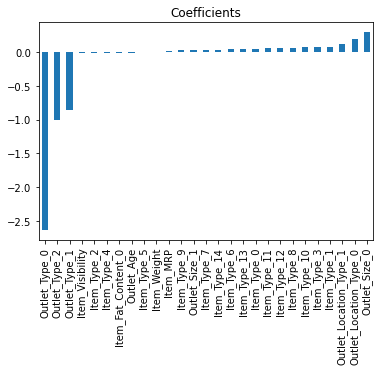

In [59]:
ridge.fit(x, y)
pred = ridge.predict(x)
print(mean_squared_error(y, pred))
print(np.sqrt(mean_squared_error(y, pred)))
print(mean_absolute_error(y, pred))
print(r2_score(y, pred))
coef_Ridge=pd.Series(ridge.coef_,x.columns).sort_values()
coef_Ridge.plot(kind='bar', title='Coefficients')

0.2902585508013033
0.5387564856234246
0.4180474229923592
0.7183414174529172


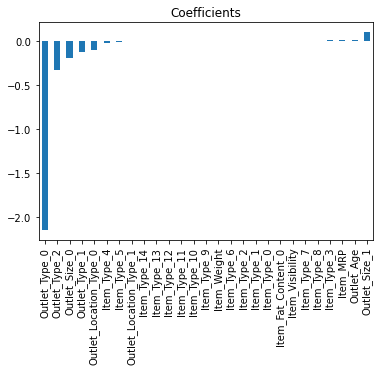

In [61]:
lasso.fit(x, y)
pred = lasso.predict(x)
print(mean_squared_error(y, pred))
print(np.sqrt(mean_squared_error(y, pred)))
print(mean_absolute_error(y, pred))
print(r2_score(y, pred))
coef_Lasso=pd.Series(lasso.coef_,x.columns).sort_values()
coef_Lasso.plot(kind='bar', title='Coefficients')

In [63]:
from sklearn.tree import DecisionTreeRegressor

2.7767015319289398e-34
1.6663437616317167e-17
3.1262879961285646e-19
1.0


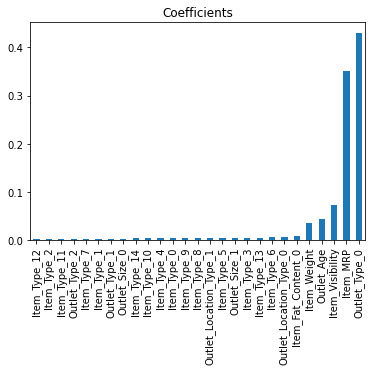

In [64]:
dtr = DecisionTreeRegressor(random_state=rstate())
dtr.fit(x, y)
pred = dtr.predict(x)
print(mean_squared_error(y, pred))
print(np.sqrt(mean_squared_error(y, pred)))
print(mean_absolute_error(y, pred))
print(r2_score(y, pred))
coef_DTR=pd.Series(dtr.feature_importances_,x.columns).sort_values()
coef_DTR.plot(kind='bar', title='Coefficients')

MSE is: 2.7767015319289398e-34
Cross validation score is : 0.45127606715150675


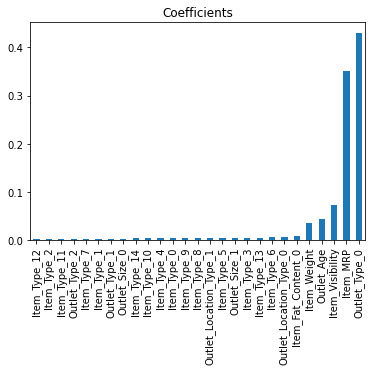

In [67]:
classify(dtr,x,y)
coef_DTR=pd.Series(dtr.feature_importances_,x.columns).sort_values()
coef_DTR.plot(kind='bar', title='Coefficients')

In [69]:
from sklearn.ensemble import RandomForestRegressor

MSE is: 0.04271879334326406
Cross validation score is : 0.6962680181277469


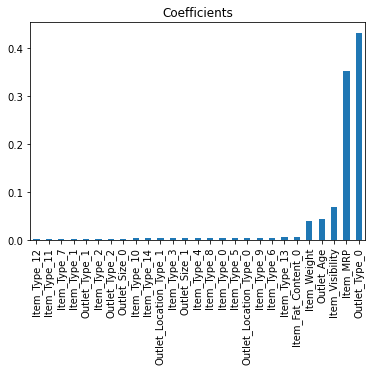

In [70]:
rfr = RandomForestRegressor()
classify(rfr,x,y)
coef_RFR=pd.Series(rfr.feature_importances_,x.columns).sort_values()
coef_RFR.plot(kind='bar', title='Coefficients')

MSE is: 1.0398099340049763e-28
Cross validation score is : 0.6631211488622937


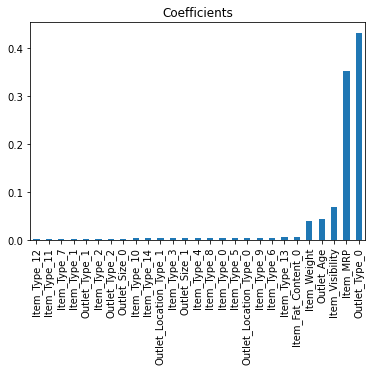

In [71]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
classify(etr,x,y)
coef_ETR=pd.Series(rfr.feature_importances_,x.columns).sort_values()
coef_ETR.plot(kind='bar', title='Coefficients')

MSE is: 0.33613566430996794
Cross validation score is : 0.6678594610440598


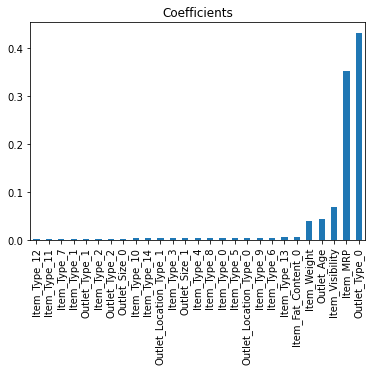

In [72]:
from sklearn.ensemble import AdaBoostRegressor
adr = AdaBoostRegressor()
classify(adr,x,y)
coef_adr=pd.Series(rfr.feature_importances_,x.columns).sort_values()
coef_adr.plot(kind='bar', title='Coefficients')

MSE is: 0.2525102221225316
Cross validation score is : 0.7355337806678418


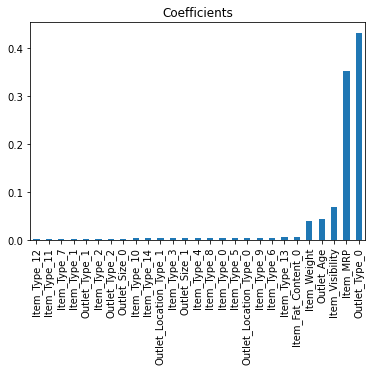

In [73]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
classify(gbr,x,y)
coef_gbr=pd.Series(rfr.feature_importances_,x.columns).sort_values()
coef_gbr.plot(kind='bar', title='Coefficients')

In [74]:
##GradientBoostingRegressor seems to be most potent
import pickle as pk
with open('HS_Pickle', 'wb') as f:
    pk.dump(gbr,f)

In [75]:
with open('HS_Pickle', 'rb') as f:
    model = pk.load(f)

In [76]:
pred = model.predict(x)
pred

array([8.22083234, 6.32704676, 7.61387223, ..., 7.15325715, 7.17441722,
       6.96407525])